In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load in airbnb data
airbnb = pd.read_csv("/Users/vincent/dsi_lcr/LCR/01_materials/notebooks/dataset/listings.csv")
airbnb

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price
0,1.318800e+04,Riley Park,Entire home/apt,4,1.0,0.0,2.0,14
1,1.335800e+04,Downtown,Entire home/apt,2,1.0,1.0,1.0,20
2,1.349000e+04,Kensington-Cedar Cottage,Entire home/apt,2,1.0,1.0,1.0,35
3,1.426700e+04,Kensington-Cedar Cottage,Entire home/apt,4,1.0,1.0,2.0,35
4,1.625400e+04,Hastings-Sunrise,Entire home/apt,4,1.0,2.0,3.0,36
...,...,...,...,...,...,...,...,...
4981,9.970000e+17,Downtown,Entire home/apt,4,1.0,1.0,2.0,3000
4982,9.970000e+17,South Cambie,Entire home/apt,4,NaN,2.0,NaN,5714
4983,9.970000e+17,South Cambie,Private room,2,1.0,1.0,0.0,8495
4984,9.970000e+17,Downtown,Entire home/apt,4,NaN,2.0,NaN,9600


In [3]:
# Determine the mean price 0.2f
mean_price = airbnb['price'].mean()
print(f"The mean price is: {mean_price:.2f}")

The mean price is: 249.17


In [4]:
# The mean 249.17
# This is the unknow since in reality we do not have the full dataset.
# We will use a sample to estimate the mean.
# Take a sample of 40 listings and determine the mean price
np.random.seed(100)
sample = airbnb.sample(n=40)
sample_mean_price = sample['price'].mean()
print(f"The sample mean price is: {sample_mean_price:.2f}")

# The variation between the sample mean and the true mean is called sampling error or variability.
# Let's take repeated samples of 40 listings and determine the mean price for each sample.
# We will do this 20000 times and store the mean prices in a list.
sample_list = []
for i in range(20000):
    sample = airbnb.sample(n=40)
    # Add a replicate column to the sample dataframe to keep track of the sample number
    sample = sample.assign(replicate = i)
    # Append the sample to the sample list
    sample_list.append(sample)
    




The sample mean price is: 222.88


In [5]:
# Concatenate the list of dataframes into a single dataframe
samples = pd.concat(sample_list)
samples

# This is a long dataframe each time we took a sample of 40 listings and repeated this 20000 times.

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price,replicate
1289,2.871834e+07,Dunbar Southlands,Entire home/apt,2,NaN,1.0,NaN,129,0
1778,3.763693e+07,West Point Grey,Private room,2,NaN,2.0,NaN,150,0
4005,8.490000e+17,Victoria-Fraserview,Private room,1,1.0,1.0,1.0,321,0
4660,9.450000e+17,Shaughnessy,Private room,2,1.0,1.0,1.0,517,0
61,9.580900e+05,Downtown,Entire home/apt,4,NaN,NaN,NaN,50,0
...,...,...,...,...,...,...,...,...,...
1787,3.774614e+07,Mount Pleasant,Entire home/apt,2,1.0,1.0,0.0,150,19999
4538,9.300000e+17,Victoria-Fraserview,Entire home/apt,6,1.0,2.0,4.0,453,19999
3448,7.270000e+17,Downtown Eastside,Entire home/apt,4,NaN,2.0,NaN,258,19999
3755,7.920000e+17,Downtown,Entire home/apt,4,1.0,1.0,2.0,291,19999


In [6]:
# Now compute the mean price for each sample grouped replicate to keep track of the sample number
sample_estimates = samples.groupby('replicate')['price'].mean().reset_index(name = "sample_mean")
sample_estimates



,replicate,sample_mean
0,0,315.250
1,1,191.000
2,2,232.400
3,3,243.025
4,4,202.800
...,...,...
19995,19995,192.525
19996,19996,265.250
19997,19997,248.900
19998,19998,283.475


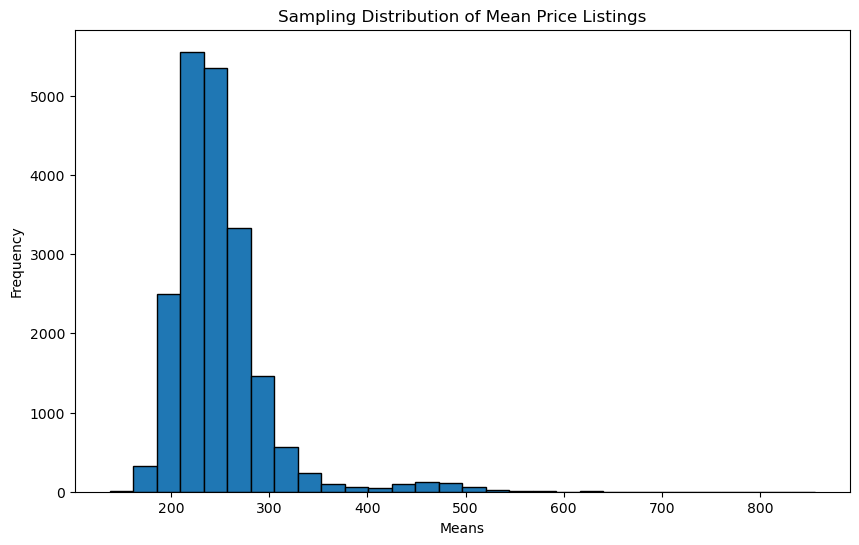

In [7]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_estimates['sample_mean'], bins=30, edgecolor='black')


# Add titles and labels
plt.title('Sampling Distribution of Mean Price Listings')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [8]:
np.random.seed(1234)
one_sample = airbnb.sample(n=40)
one_sample['price'].mean()

219.85

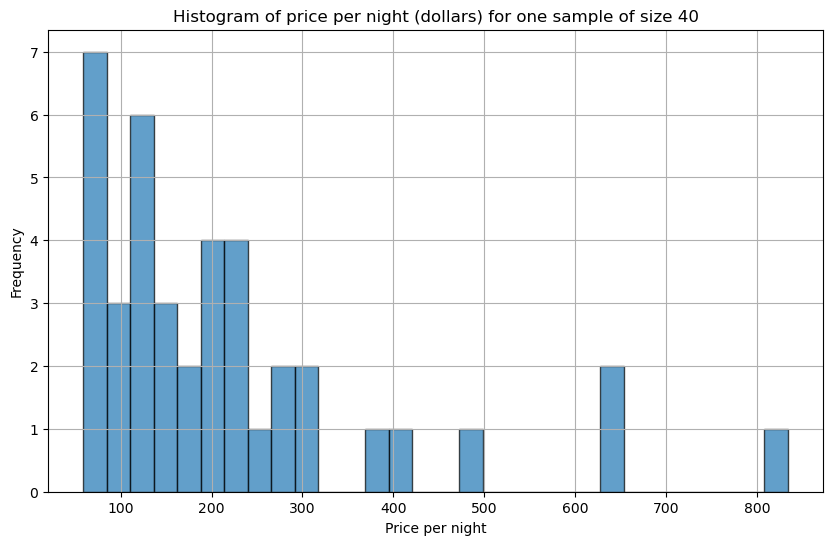

In [9]:
# Histogram of price per night (dollars) for one sample of size 40.
plt.figure(figsize=(10, 6))
plt.hist(one_sample['price'], bins=30, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of price per night (dollars) for one sample of size 40')
plt.xlabel('Price per night')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [10]:
# Now compute a point estimate 40 listings with replacment using a bootstarp
boot1 = one_sample.sample(frac = 1, replace = True)


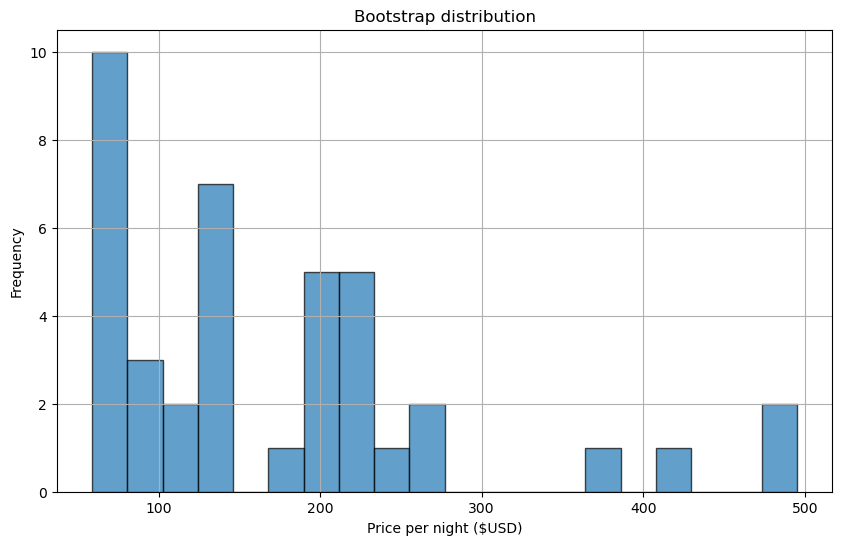

In [11]:
# Plot the histogram of the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(boot1['price'], bins=20, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Bootstrap distribution')
plt.xlabel('Price per night ($USD)')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [12]:
# The key takeaway is the bootstrap is very similar close approximation to the entire population

# Initialize an empy list
# Take a sample of 40 listing and repeat 20000 with replacment
bootstrap_samples = []

for i in range(20_000):
    sample = one_sample.sample(frac = 1, replace=True) 
    sample = sample.assign(replicate = i)
    bootstrap_samples.append(sample)

boot2000 = pd.concat(bootstrap_samples)

In [13]:
boot_means = boot2000.groupby("replicate")["price"].mean().reset_index(name="mean_price")
boot_means

,replicate,mean_price
0,0,208.250
1,1,205.800
2,2,183.925
3,3,211.600
4,4,239.475
...,...,...
19995,19995,176.725
19996,19996,217.450
19997,19997,204.600
19998,19998,216.900


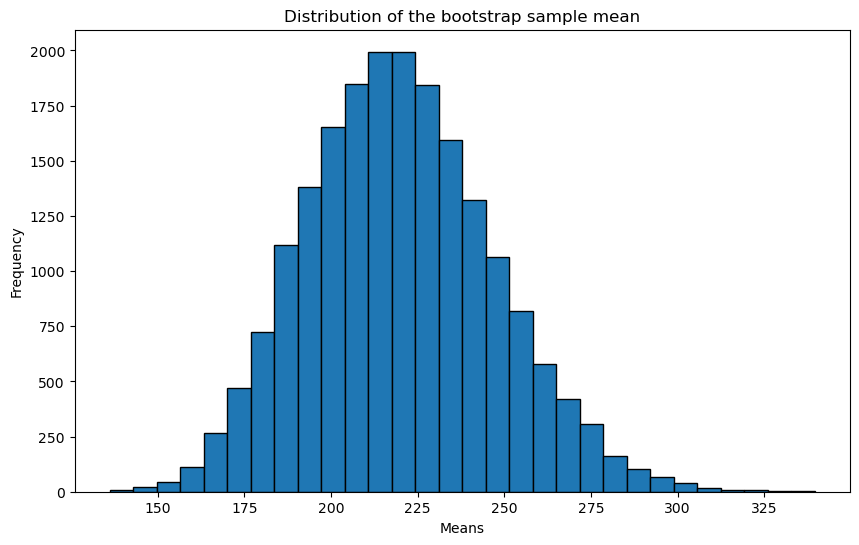

In [14]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(boot_means['mean_price'], bins=30, edgecolor='black')


# Add titles and labels
plt.title('Distribution of the bootstrap sample mean')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# The wider the distribution the more variability 

In [15]:
# Compute the 95% confidence interval using the percentile method
ci_bounds = boot_means['mean_price'].quantile([0.025,0.975])
ci_bounds

0.025    171.248750
0.975    276.300625
Name: mean_price, dtype: float64

In [16]:
# Based on the bootstrap sample of 40 listings we are 95% confident that the true mean price is between $171.25 and $276.30
# If the range is wide we can increase the sample size to reduce the variability and get a more precise estimate.
# Recall the true mean price is $249.17
# Let's find the ideal sample size to get a more precise estimate.
sample_sizes = [10, 20, 40, 80, 160, 320]
ci_results = []
for size in sample_sizes:
    one_sample = airbnb.sample(n=size, random_state=1234)
    bootstrap_samples = []
    for i in range(2000):
        sample = one_sample.sample(frac = 1, replace=True) 
        sample = sample.assign(replicate = i)
        bootstrap_samples.append(sample)
    boot2000 = pd.concat(bootstrap_samples)
    boot_means = boot2000.groupby("replicate")["price"].mean().reset_index(name="mean_price")
    ci_bounds = boot_means['mean_price'].quantile([0.025,0.975])
    ci_results.append({
        'sample_size': size,
        'ci_lower': ci_bounds.iloc[0],
        'ci_upper': ci_bounds.iloc[1],
        'ci_width': ci_bounds.iloc[1] - ci_bounds.iloc[0]
    })
ci_df = pd.DataFrame(ci_results)
ci_df


,sample_size,ci_lower,ci_upper,ci_width
0,10,126.392500,366.602500,240.210000
1,20,162.793750,324.926250,162.132500
2,40,171.021875,275.475625,104.453750
3,80,199.747813,285.080625,85.332812
4,160,213.381094,266.727344,53.346250
5,320,224.477422,271.522031,47.044609


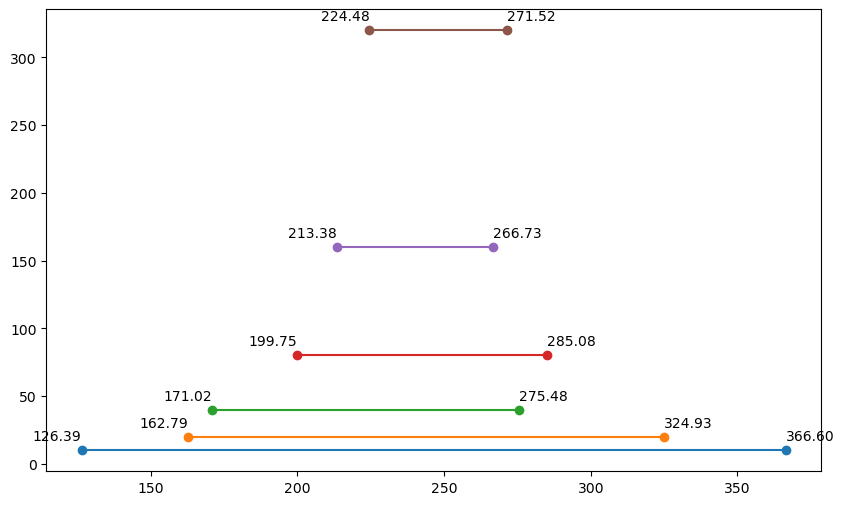

In [18]:
# Plot each confidence interval
plt.figure(figsize=(10, 6))
for index, row in ci_df.iterrows():
    plt.plot([row['ci_lower'], row['ci_upper']], [row['sample_size'], row['sample_size']], marker='o')
    plt.text(row['ci_lower'], row['sample_size'] + 5, f"{row['ci_lower']:.2f}", verticalalignment='bottom', horizontalalignment='right')
    plt.text(row['ci_upper'], row['sample_size'] + 5, f"{row['ci_upper']:.2f}", verticalalignment='bottom', horizontalalignment='left')

    